<a href="https://colab.research.google.com/github/mjschettini/ProcessamentoDigitalDeImagens2/blob/main/Trabalho_2_PDI_Maria_J%C3%BAlia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Restauração de imagens usando a Transformada Rápida de Fourier

 A Transformada Rápida de Fourier converte uma image do domínio do espaço para uma representação no domínio da frequência. 
 
 Faça uma análise das frequências obtidas para a [imagem](https://drive.google.com/file/d/1Udgllcno-XQOfE1RrIXGuiCopFYhn0pR/view?usp=sharing) abaixo e, utilizando uma máscara apropriada, remova as frequências indesejadas para remover o ruído.

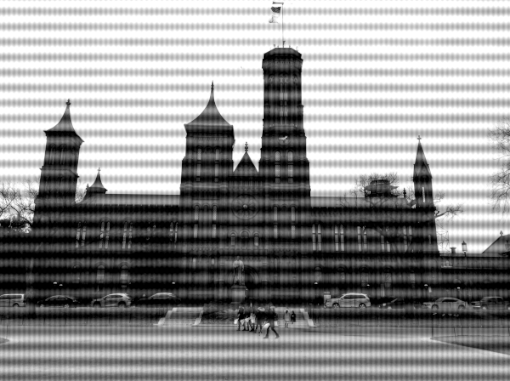

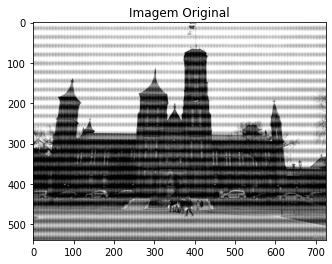

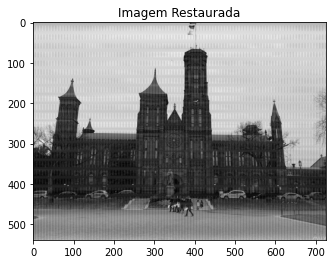

In [9]:
import cv2
import numpy as np
from scipy import fftpack as fp
from matplotlib import pyplot as plt

#Lendo a imagem 
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagens/img1.jpg', 0) 

#Plotando a Imagem Original
plt.figure()
plt.title('Imagem Original')
plt.imshow(img, cmap='gray')

#Obtendo o tamanho da imagem
w, h = img.shape

#Criando uma imagem zerada do tamanho da original
H = np.zeros((w, h)) 

#Definindo os raios dos circulos (R = maior e r = menor)
r = 100
R = 264 
#Pegando a divisão inteira da altura por 2
div = h//2

#Gerando o circulo mais externo e removendo frequencias dentro do circulo
cv2.circle(H,(div,w//2), R, 1, -1) 
cv2.line(H,(div,div-80),(div,div+R), 0, 2)
cv2.line(H,(div,div-100),(div,div-R-100), 0, 2)

#aplicando o filtro passa-baixa
H = fp.fftshift(H) 
F = fp.fft2(img)
Fg = F*H

#Gerando a transformada inversa
fBlur = fp.ifft2(Fg)
fBlur = np.absolute(fBlur)


#Plotando a imagem restaurada
plt.figure()
plt.title('Imagem Restaurada')
plt.imshow(fBlur, cmap='gray')


#2. Erosão e Dilatação

Crie duas funções chamadas videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento semelhante para videoDilatacao(), porém fazendo o oposto da operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">clique aqui</a>.

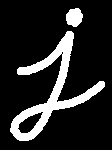

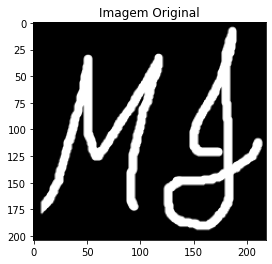

In [12]:
import cv2
import numpy as np
#Função q rotarna uma imagem dilatada a partir de uma imagem e o seu valor de dilatação
def dilatacao(img, i):
	kernel = np.ones((i,i),np.uint8)
	dilatada = cv2.dilate(img, kernel, iterations = 1)
	return dilatada
#Função q rotarna uma imagem ao passar pelo processo de erosao
def erosao(img, i):
	kernel = np.ones((i,i),np.uint8)
	erosion = cv2.erode(img,kernel,iterations=1)
	return erosion

#Lendo a imagem 
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagens/mj.png')

#Gerando os vídeos de saída
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
outD = cv2.VideoWriter("dilatacao.avi", fourcc, 20.0, (640, 480))
outE = cv2.VideoWriter("erosao.avi", fourcc, 20.0, (640, 480))

for i in range (1, 100):
	#Chamando a função dilatação a partir da imagem lida
	frameD = dilatacao(img, i)
	#Redimensionando as dimensões da imagem
	newFrameD = cv2.resize(frameD, (640, 480), interpolation = cv2.INTER_AREA)
	#Escrevendo no arquivo de saída (vídeo)
	outD.write(newFrameD)

for i in range (1, 25):
	#Chamando a função erosao a partir da imagem lida
	frameE = erosao(img, i)
	#Redimensiona o tamanho da imagem
	newFrameE = cv2.resize(frameE, (640, 480), interpolation = cv2.INTER_AREA)
	#escreve no arquivo
	outE.write(newFrameE)

#Encerrando os recursos de vídeo
outD.release()
outE.release()

#Plotando a Imagem Original 
plt.figure()
plt.title('Imagem Original')
plt.imshow(img)



Links para os vídeos: 

**Vídeo referente à erosão aplicada à imagem:**
https://drive.google.com/file/d/1g7OV8ANu9h6u0LN6cCinbVrjpSjLGXK6/view?usp=sharing

**Vídeo referente à dilatação aplicada à imagem:**
https://drive.google.com/file/d/1r6OIOP0n3j6elOWmFCEg-N2edR7hCK-H/view?usp=sharing

#3. Detecção de linhas usando a Transformada de Hough

A Transformada de Hough é uma técnica que auxilia na detecção de formas geométricas em imagens digitais. 

Nesta aplicação, você deverá identificar as linhas que limitam uma via para que um carro autônomo possa seguir em tempo real. Devido a mudanças de iluminação, será necessário utilizar a transformada de Hough para conectar retas desconectadas. Utilize o seguinte [vídeo](https://drive.google.com/file/d/1G33NiG3rQuec-1hC-FshmjhLWiU1bGtO/view?usp=sharing) como entrada do algoritmo. O resultado de um frame deve ser como a imagem abaixo.

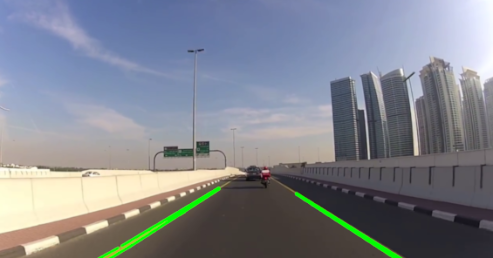

In [ ]:
#Exercício executado no terminal.
import cv2
import numpy as np

#Lendo o vídeo
video = cv2.VideoCapture("road_car_view.mp4")
#Defindo que o programa só vai parar quando o usuário encerrar a janela

while (True):
    #Lendo o vídeo frame a frame 
    _,frame = video.read()
    saida = np.copy(frame)
    x = 800
    y = x*0.4

    #Convertendo os frames em HSV
    HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    #Definindo os valores mínimos e máximos para percepção das lines
    vMax = np.array([25, 255, 255])
    vMin = np.array([18, 55, 119])
    #Aplicando os valores mínimos e máximos nos frames
    mask = cv2.inRange(HSV, vMin, vMax)
    arestas = cv2.Canny(mask, x,y)

    #Aplicando Hough
    lines = cv2.HoughLinesP(arestas, 2, np.pi/180.0, 50, minLineLength=35, maxLineGap=10)
    for lines in lines:
        x1, y1, x2, y2 = lines[0]
        cv2.line(saida, (x1,y1), (x2,y2), (0,255,0), 3)

    #Exibindo a saída
    cv2.imshow("Linhas", arestas)
    cv2.imshow("Saída", saida)
    if cv2.waitKey(25) & 0xFF == ord('q'):
       break

cv2.destroyAllWindows()

#4. Segmentação de Imagens com K-Means

Quando falamos de segmentação de imagens, dizemos que vamos localizar segmentos das imagens. Um algoritmo que realiza essa tarefa é o K-Means.

No vídeo abaixo é apresentado como usar esse algoritmo para fazer quantização de imagens, ou seja, representar as cores originais em menos quantidades.

Dito isso, assista o vídeo abaixo e implemente um algoritmo que transforma qualquer imagem em um gráfico para jogo 8 bits. Assim, pegue uma imagem e gere ela novamente com apenas 256 cores usando o K-means.

<a href="https://www.youtube.com/watch?v=iHlve4t5z-0"><img src="https://img.youtube.com/vi/iHlve4t5z-0/mqdefault.jpg"/></a>

OBS: O algoritmo K-means é discutido em mais detalhes nos vídeos abaixo.

<a href="https://www.youtube.com/watch?v=2hsMErlQtcI"><img src="https://img.youtube.com/vi/2hsMErlQtcI/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=p2twwtegYkU"><img src="https://img.youtube.com/vi/p2twwtegYkU/mqdefault.jpg"/></a>

In [ ]:
from google.colab.patches import cv2_imshow 
import numpy as np
import cv2

def computeKmeans(img):
	#Definindo as dimensões da imagem
	matrizZ = img.reshape((-1,3))
	matrizZ = np.float32(matrizZ)
	#Definindo a quantidade de cores, padrão total 256
	quant = 256
	#Finalizando Kmeans (função)
	criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 25, 0.1) 
	#Utilizando K-Means
	_, labels, centroide = cv2.kmeans(matrizZ, quant, None, criteria, 25, cv2.KMEANS_RANDOM_CENTERS) 
	
	#Aplicando as cores (256)
	centroide = np.uint8(centroide)
	centroideImg = centroide[labels.flatten()]
	saida = centroideImg.reshape((img.shape))

	#Plotando a imagem 
	cv2_imshow(img)
	cv2_imshow(saida)
	
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/imagens/img4.jpg')
computeKmeans(img)

#5. Segmentação usando o algoritmo GrabCut

Quando o assunto é obter o segmento exato que contém um objeto, o algoritmo GrabCut é excelente.

Nos vídeos abaixos há exemplos de sua implementação. 

<a href="https://www.youtube.com/watch?v=HBp6vQXFQgc"><img src="https://img.youtube.com/vi/HBp6vQXFQgc/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=DyRfAIQfVug"><img src="https://img.youtube.com/vi/DyRfAIQfVug/mqdefault.jpg"/></a>

Baseado nisso e nos conhecimentos anteriores, crie um algoritmo que segmente sua imagem e adicione por cima do fundo o efeito de borramento, usando um dos filtros explicados em lições passadas.

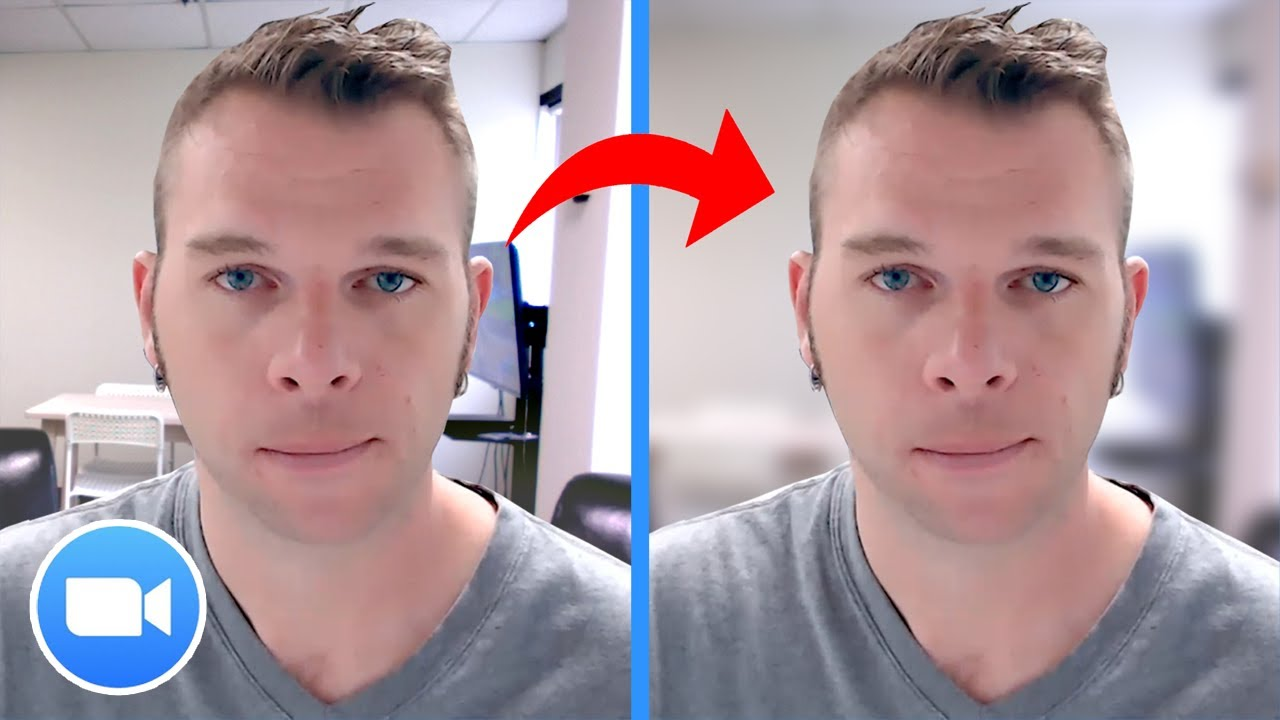

In [ ]:
#Exercício executado no terminal, pois o colab não permitiu a abertura de uma janela.
from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog
import cv2
import numpy as np

class GrabCutGUI(Frame):
    def __init__(self, master = None):
        #Inicializando a interface e o frame
        Frame.__init__(self, master)
        self.iniciaUI()

    def iniciaUI(self):
        #Inicializando a janela
        self.master.title("Imagem Original")
        self.pack()
        self.mouseActions()

        #Obtendo a imagem do computador 
        self.imagem, self.imagemblur = self.carregaImagem()
        #Criando um canvas para a imagem e desenhando-a e fixando os elementos no canvas
        self.canvas = Canvas(self.master, width = self.imagem.width(), height = self.imagem.height(), cursor = "cross")
        self.canvas.create_image(0, 0, anchor = NW, image = self.imagem)
        self.canvas.image = self.imagem 
        self.canvas.pack()

    #Definindo as ações do mouse
    def mouseActions(self):
        self.startX = None
        self.startY = None
        self.rect   = None
        self.rectangleReady = None
        self.master.bind("<ButtonPress-1>", self.btClick)
        self.master.bind("<B1-Motion>", self.btClickMovimento)
        self.master.bind("<ButtonRelease-1>", self.looseButton)

    def looseButton(self, event):
        if self.rectangleReady:
            #Definindo uma nova janela
            windowGrabcut = Toplevel(self.master)
            windowGrabcut.wm_title("Final")
            windowGrabcut.minsize(width = self.imagem.width(), height = self.imagem.height())
            #Criando um canvas para a janela criada
            canvasGrabcut = Canvas(windowGrabcut, width = self.imagem.width(), height = self.imagem.height())
            canvasGrabcut.pack()
            #Aplicando o grabcut na imagem e invocando-o
            mask = np.zeros(self.imagemOpenCV.shape[:2], np.uint8)
            rectGcut = (int(self.startX), int(self.startY), int(event.x - self.startX), int(event.y - self.startY))
            fundoModel = np.zeros((1, 65), np.float64)
            objModel = np.zeros((1, 65), np.float64)
            cv2.grabCut(self.imagemOpenCV, mask, rectGcut, fundoModel, objModel, 5, cv2.GC_INIT_WITH_RECT)
            mascaraFinal = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
            saida = self.imagemOpenCV * mascaraFinal[:,:,np.newaxis]

            #Convertendo de PhotoImage para PIL
            imgBlur = ImageTk.getimage(self.imagemblur)

            #Convertendo de PIL para OPENCV
            self.opencvImageblur = cv2.cvtColor(np.array(imgBlur), cv2.COLOR_RGB2BGR)
            for x in range(0, self.imagemOpenCV.shape[1]):
                for y in range(0, self.imagemOpenCV.shape[0]):
                    if(mascaraFinal[y][x] == 0):
                        saida [y][x][0] = self.opencvImageblur[y][x][0]
                        saida [y][x][1] =  self.opencvImageblur[y][x][1]
                        saida[y][x][2] =  self.opencvImageblur[y][x][2]

            #Convertendo a imagem pra Tkinter
            saida = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)
            saida = Image.fromarray(saida)
            saida = ImageTk.PhotoImage(saida)
            #Colocando a imagem no canvas
            canvasGrabcut.create_image(0, 0, anchor = NW, image = saida)
            canvasGrabcut.image = saida

    def btClickMovimento(self, event):
        currentX = self.canvas.canvasx(event.x)
        currentY = self.canvas.canvasy(event.y)
        #Atualizando o retângulo a ser delimitado e verifiicando se ele foi feito
        self.canvas.coords(self.rect, self.startX, self.startY, currentX, currentY)
        self.rectangleReady = True

    #Convertendo as coordenadas do frame para as do canvas (ação quando o botão é pressionado) 
    def btClick(self, event):
        self.startX = self.canvas.canvasx(event.x)
        self.startY = self.canvas.canvasy(event.y)
        if not self.rect:
            self.rect = self.canvas.create_rectangle(0, 0, 0, 0, outline="red")

    #Carregando a imagem do computador
    def carregaImagem(self):
        #Obtendo o caminho da imagem selecionada
        diretorio = filedialog.askopenfilename()
        #Verificando se a imagem foi selecionada
        if(diretorio != None):
            #Convertendo a imagem para PhotoImage
            self.imagemOpenCV = cv2.imread(diretorio)
            image = cv2.cvtColor(self.imagemOpenCV, cv2.COLOR_BGR2RGB)
            imagemBlur = cv2.blur(image,(20,20))
            #Convertendo pra PIL
            image = Image.fromarray(image)
            imagemBlur = Image.fromarray(imagemBlur)
            #Convertendo para PhotoImage
            image = ImageTk.PhotoImage(image)
            imagemBlur = ImageTk.PhotoImage(imagemBlur)
            return [image, imagemBlur]

def main():
    #Inicializando a biblioteca Tkinter (para interfaces)
    root = Tk()
    #Inicializando a aplicação e o o loop do programa
    appcut = GrabCutGUI(master = root)
    appcut.mainloop()

if __name__ == "__main__":
    main()